### We study the fermionic analytic continuation in this note

$$G(\tau)=\int_0^{\infty} \frac{e^{-\omega (\tau-\beta/2)}}{2cosh(\beta \omega/2)}A(\omega)d\omega$$

In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

In [2]:
def Kernel(w, t, beta):
    x=beta*w/2
    y=2*t/beta-1
    if x>100:
        return np.exp(-x*(y+1.))
    if x<-100:
        return np.exp(x*(1.0-y))
    return np.exp(-x*y)/(2*np.cosh(x))

In [36]:
Nw=1000
w=np.linspace(0,100,Nw)

In [37]:
beta=10
Nt=1000
t=np.linspace(0,beta,Nt)

In [38]:
kMatrix=np.zeros([Nw,Nt])

In [39]:
for i in range(len(w)):
    for j in range(len(t)):
        kMatrix[i,j]=Kernel(w[i],t[j],beta)

In [40]:
u,s,v=linalg.svd(kMatrix)

In [41]:
v_inv=linalg.inv(v)

In [42]:
np.dot(v_inv,v)

array([[  1.00000000e+00,   1.11733396e-15,   4.05072130e-16, ...,
         -2.73950313e-16,  -1.38541711e-17,   2.50420185e-16],
       [ -4.07871858e-16,   1.00000000e+00,  -9.98660041e-16, ...,
         -2.27088339e-16,   1.22852679e-16,   4.47676540e-16],
       [  7.33409195e-16,  -1.79602149e-16,   1.00000000e+00, ...,
          3.92569966e-16,   3.72324555e-16,  -2.12895802e-16],
       ..., 
       [  2.15875876e-17,  -4.02309085e-17,   2.63450011e-17, ...,
          1.00000000e+00,  -5.34294831e-16,   2.91433544e-16],
       [  4.39185524e-17,   1.88551354e-17,  -9.57819563e-17, ...,
         -1.26981758e-15,   1.00000000e+00,   6.73072709e-16],
       [ -1.97438086e-17,   3.56306394e-17,  -1.54533114e-16, ...,
          4.16333634e-17,   4.57966998e-16,   1.00000000e+00]])

In [50]:
G=np.exp(-np.pi*1j/2/beta*t)/(1-1j)*np.exp(-t*1.0)
G

array([  5.00000000e-01 +5.00000000e-01j,
         4.95797703e-01 +4.94240996e-01j,
         4.91628302e-01 +4.88545901e-01j,
         4.87491568e-01 +4.82914027e-01j,
         4.83387273e-01 +4.77344694e-01j,
         4.79315193e-01 +4.71837228e-01j,
         4.75275103e-01 +4.66390962e-01j,
         4.71266779e-01 +4.61005237e-01j,
         4.67289999e-01 +4.55679401e-01j,
         4.63344543e-01 +4.50412808e-01j,
         4.59430189e-01 +4.45204819e-01j,
         4.55546721e-01 +4.40054802e-01j,
         4.51693919e-01 +4.34962131e-01j,
         4.47871569e-01 +4.29926187e-01j,
         4.44079455e-01 +4.24946359e-01j,
         4.40317363e-01 +4.20022039e-01j,
         4.36585081e-01 +4.15152628e-01j,
         4.32882397e-01 +4.10337532e-01j,
         4.29209100e-01 +4.05576166e-01j,
         4.25564983e-01 +4.00867947e-01j,
         4.21949836e-01 +3.96212301e-01j,
         4.18363454e-01 +3.91608659e-01j,
         4.14805630e-01 +3.87056458e-01j,
         4.11276160e-01 +3.8255514

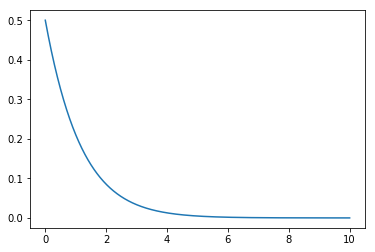

In [51]:
plt.figure()
plt.plot(t, G.real)
plt.show()

In [52]:
e=np.dot(G,v_inv)

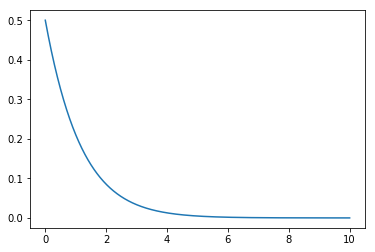

In [53]:
plt.figure()
plt.plot(t, np.dot(e, v).real)
plt.show()

In [58]:
f=np.dot(G, v_inv[:,:20])

In [59]:
f

array([ -2.96202119e+00 -2.64630565e+00j,
        -2.06237890e+00 -1.49890938e+00j,
         6.89943780e-01 +9.10000768e-01j,
         9.61648729e-01 +7.22225499e-01j,
        -1.49934947e-01 +1.07374600e-01j,
         2.12796685e-01 +2.72070288e-01j,
        -1.68662029e-01 -1.07778513e-01j,
        -4.97925561e-02 +1.50318720e-02j,
         1.10812890e-02 +3.82547818e-02j,
        -2.04426678e-02 -2.05619655e-02j,
         1.17895752e-02 +3.97192280e-03j,
         3.57739885e-03 -2.36171600e-03j,
        -1.74333300e-04 -2.62205399e-03j,
        -9.66244975e-04 -1.32497322e-03j,
        -6.88379568e-04 -3.60875288e-04j,
        -3.05612923e-04 +3.29591695e-05j,
        -8.16075223e-05 +1.04407298e-04j,
        -3.56146450e-06 -7.12192451e-05j,
         2.00811509e-05 +3.15399348e-05j,  -1.47286478e-05 -9.02591178e-06j])

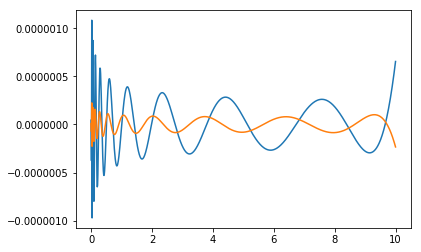

In [61]:
df=np.dot(f, v[:20,:])-G
plt.figure()
plt.plot(t, df.real)
plt.plot(t, df.imag)
plt.show()